# Data Disponibility Analysis

The objective of this notebook is to check the data availability and test if there is enough observations to go further in the question. <br>

<h3><b>Objectives:<b><br></h3>
<ol>
<li> Check the number of NaN's in <b>GDP</b> ( our main feature in the future models)</li>
<li> Check the number of NaN's <b>private investment</b> feature (one of our main tests) </li>
<li> Check the number of NaN's <b>public investment</b> feature (one of our main tests) </li>
<li> Check the year with most data in our features so we can perform the I-distance method better </li>

<div class="alert alert-success">
It is important to say that we are here exploring the data so we can apply the I-distance method. <br> <br>
Another very important thing is that, when choosing for one year to apply the method, there is no intention to use imputation methods for investment variables (which are our main concern here as indicator) <b>because, only the cities that receive investment have values</b>, so there is no point to use completion when choosing just one year. 
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math, Latex
% matplotlib inline


df = pd.read_csv('SPcities2.csv', decimal=',', encoding='Iso-8859-1', sep=';')

# In this dataset we have years that go beyond our interest, that is 2015 and less, so here I`m going to restrict to the interest

df = df[df.year < 2016]
df.head()

,city,year,gdp_per,gdp_growth,private_inv,pub_inv,export,import,violence,HDI,...,hosp_rooms,hosp_rooms_per,jobs,jobs_revenue,population,urban_pop,rural_pop,olding,urbing,fundamental
0,Adamantina,2000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.721,...,NaN,NaN,5338.0,547.80,33484,30356,3128.0,60.91,90.66,NaN
1,Adamantina,2001,NaN,NaN,NaN,NaN,NaN,NaN,293,NaN,...,NaN,NaN,5418.0,602.97,33577,30475,3102.0,64.06,90.76,544.0
2,Adamantina,2002,8355.50,NaN,NaN,NaN,NaN,NaN,326,NaN,...,NaN,NaN,6006.0,654.70,33636,30635,3001.0,67.36,91.08,591.0
3,Adamantina,2003,9936.93,0.190718,NaN,NaN,7509556.0,NaN,289,NaN,...,NaN,NaN,6223.0,709.64,33677,30796,2881.0,70.87,91.45,677.0
4,Adamantina,2004,9983.64,0.005835,NaN,NaN,6864268.0,NaN,433,NaN,...,NaN,NaN,6751.0,762.66,33715,30958,2757.0,74.62,91.82,594.0


<h4> 1.Check the number of NaN's in GDP ( our response in the future models) </h4>

In [2]:
data = df[df.city.notnull()]
missing_features = data.isnull().sum()
missing_features/len(df)

#number of nulls in the features divided by the number of observations

city               0.000000
year               0.000000
gdp_per            0.187597
gdp_growth         0.250000
private_inv        0.961628
pub_inv            0.906977
export             0.556977
import             0.600484
violence           0.000000
HDI                0.875000
educ_superior      0.875097
primary_enrolls    0.437500
density_pop        0.000000
value_add          0.187500
agriculture_add    0.188760
industry_add       0.187500
services_add       0.187500
eletricity         0.062500
tax_revenue        0.250000
hosp_rooms         0.721705
hosp_rooms_per     0.721705
jobs               0.000000
jobs_revenue       0.000000
population         0.000000
urban_pop          0.000000
rural_pop          0.041570
olding             0.000000
urbing             0.000000
fundamental        0.251066
dtype: float64

It seems that some features like: HDI, educ_superior, hosp_rooms and investments do not have too much data, so to perform the I-distance better we will need to choose the year with more data avaible (we are goind to check it further).

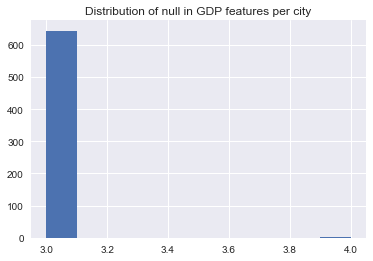

In [3]:
# lets look the distribution of NaN values in different cities 

## GDP
null_gdp = data.gdp_per.isnull().groupby(data['city']).sum()

plt.hist(null_gdp)
plt.title('Distribution of null in GDP features per city')

It seems we have the same problem for all cities, so there must be the same years for all of them

In [4]:
n_cities = len(np.unique(data.city))
null_gdp_year = data.gdp_per.notnull().groupby(data['year']).sum()


print('Number of unique cities: ', n_cities)
null_gdp_year

Number of unique cities:  645


year
2000      0.0
2001      0.0
2002    645.0
2003    644.0
2004    645.0
2005    645.0
2006    645.0
2007    645.0
2008    645.0
2009    645.0
2010    645.0
2011    645.0
2012    645.0
2013    645.0
2014    645.0
2015      0.0
Name: gdp_per, dtype: float64

so here we have the problem: in 2000, 2001 and 2015 we have no gdp information. This years will have no use for us here, so we are going to avoid them. 

<h4> 2.Check the number of NaN's private investment feature (one of our main tests) </h4>

Number of unique cities:  645
Number cities with at least 1 value of private investment:  137
% of cities with non null value in private investment:  21.240310077519382


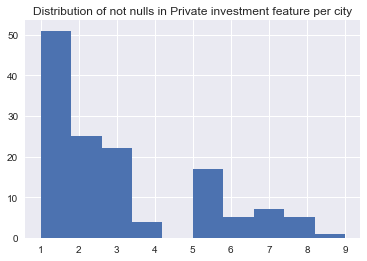

In [5]:
## Private Investment


null_private = data['private_inv'].notnull().groupby(data['city']).sum()

# here we need to check in the cities that have some private investment value, how the distribution of NaN looks? 

print('Number of unique cities: ', n_cities)
print('Number cities with at least 1 value of private investment: ', len(null_private[null_private>0]))
print('% of cities with non null value in private investment: ', len(null_private[null_private>0])/n_cities * 100)

plt.hist(null_private[null_private>0])
plt.title('Distribution of not nulls in Private investment feature per city')

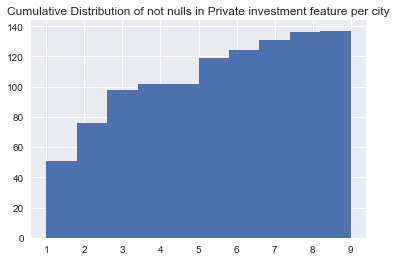

In [6]:
plt.hist(null_private[null_private>0], cumulative=True)
plt.title('Cumulative Distribution of not nulls in Private investment feature per city')

In [7]:
# lets check if there is some concetration in any year that we have at least 1 value for private investment :

null_private_year = data['private_inv'].notnull().groupby(data['year']).sum()
null_private_year

#count of Nan`s by year

year
2000     0.0
2001     0.0
2002     1.0
2003     0.0
2004     0.0
2005     2.0
2006     2.0
2007     3.0
2008    11.0
2009    12.0
2010    25.0
2011    51.0
2012    70.0
2013    73.0
2014    72.0
2015    74.0
Name: private_inv, dtype: float64

It seems that the years after 2013 is the year where the most part of private investment data is concentrated.

<h4> 3.Check the number of NaN's public investment feature (one of our main tests) </h4>

Number of unique cities:  645
Number cities with at least 1 value of public investment:  489
% of cities with value in public investment:  75.81395348837209


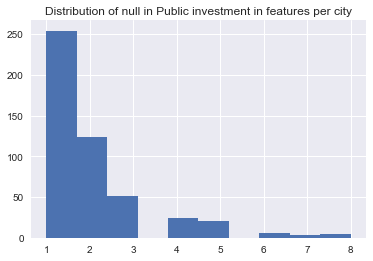

In [8]:
## Public Investment


null_pub = data['pub_inv'].notnull().groupby(data['city']).sum()

# here we need to check in the cities that have some public investment value, how the distribution of NaN looks? 

print('Number of unique cities: ', n_cities)
print('Number cities with at least 1 value of public investment: ', len(null_pub[null_pub >0]))
print('% of cities with value in public investment: ', len(null_pub[null_pub >0])/n_cities * 100)

plt.hist(null_pub[null_pub >0])
plt.title('Distribution of null in Public investment in features per city')

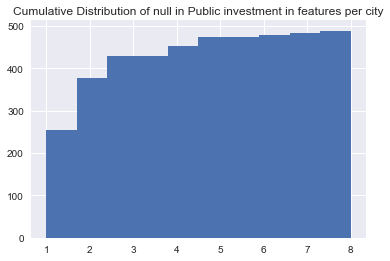

In [9]:
plt.hist(null_pub[null_pub>0], cumulative=True)
plt.title('Cumulative Distribution of null in Public investment in features per city')

In [10]:
# lets check if there is some concetration in any year that we have at least 1 value for public investment :

null_public_year = data['pub_inv'].notnull().groupby(data['year']).sum()
null_public_year

#count of Nan`s by year

year
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005      0.0
2006      0.0
2007     47.0
2008     42.0
2009     33.0
2010    134.0
2011     89.0
2012    105.0
2013    409.0
2014    100.0
2015      1.0
Name: pub_inv, dtype: float64

there is a very good insight here: again, 2013 is the year with most values for the public investment, just like private investment. Here it seems that 2013 would be our most likely option.

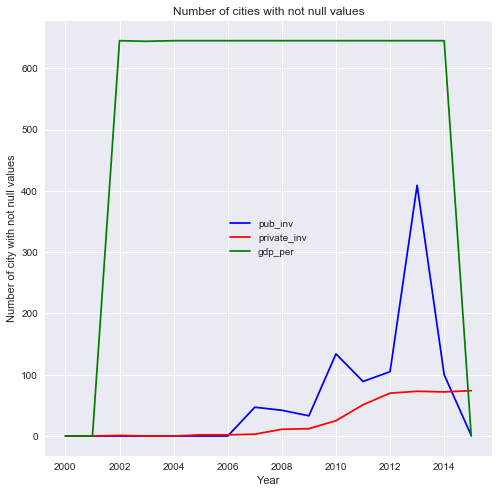

In [13]:
plt.figure(figsize=(8,8))

plt.plot(null_public_year, color='b' )
plt.plot(null_private_year, color='r' )
plt.plot(null_gdp_year, color='g' )
plt.legend(loc=10)
plt.xlabel('Year')
plt.ylabel('Number of city with not null values')
plt.title('Number of cities with not null values')

Visually, it seems that 2013 looks like a good year, but just check for one more thing. <br><br>

How much of this cities have both types of investment? In other words, how much this informations overlap? 

In [12]:
overlap = data[data.private_inv.notnull() | data.pub_inv.notnull()]
overlap_count = len(overlap[overlap.private_inv.notnull() & overlap.pub_inv.notnull()])
justprivate = len(overlap[overlap.private_inv.notnull() & overlap.pub_inv.isnull()])
justpub = len(overlap[overlap.private_inv.isnull() & overlap.pub_inv.notnull()])

print("(%) Cities with just private investment:", justprivate/len(overlap))
print("(%) Cities with just public investment:", justpub/len(overlap))
print("(%) Cities with bost investments:", overlap_count/len(overlap))


(%) Cities with just private investment: 0.20398009950248755
(%) Cities with just public investment: 0.6716417910447762
(%) Cities with bost investments: 0.12437810945273632


So, there is a lot of values with bot investments and a similar amount with osolate values, which could be good to balance our analysis. <br> <br>

Once that 2013 is the clear choice, there is one more check to be done. Look for features that , in this year, could not have values.

In [14]:
data = df[df.year == 2013]

# checking the distribution of non NaN values in the features
notnull = data[data.notnull()].count()
notnull

city               645
year               645
gdp_per            645
gdp_growth         645
private_inv         73
pub_inv            409
export             354
import             377
violence           645
HDI                  0
educ_superior        0
primary_enrolls    645
density_pop        645
value_add          645
agriculture_add    644
industry_add       645
services_add       645
eletricity         645
tax_revenue          0
hosp_rooms         358
hosp_rooms_per     358
jobs               645
jobs_revenue       645
population         645
urban_pop          645
rural_pop          615
olding             645
urbing             645
fundamental        645
dtype: int64

Here we can see that we need to drop 3 features here, since there is no data : HDI, educ_superior and tax_revenue

In [15]:
# cleaning the all null features

data_clean = data
data_clean = data_clean.drop('HDI', 1)
data_clean = data_clean.drop('educ_superior', 1)
data_clean = data_clean.drop('tax_revenue', 1)

data_clean.head()

,city,year,gdp_per,gdp_growth,private_inv,pub_inv,export,import,violence,primary_enrolls,...,hosp_rooms,hosp_rooms_per,jobs,jobs_revenue,population,urban_pop,rural_pop,olding,urbing,fundamental
13,Adamantina,2013,24097.48,0.096675,NaN,696535.15,29152328.0,239286.0,301,101.16,...,284.0,8.39,8936.0,1600.40,33845,32233,1612.0,113.53,95.24,476.0
30,Adolfo,2013,20871.22,0.382122,2.4,408000.00,NaN,3500.0,48,107.65,...,NaN,NaN,816.0,1625.53,3523,3206,317.0,97.44,91.00,39.0
47,Aguaí,2013,19918.32,0.163114,NaN,140850.00,NaN,311038.0,495,97.65,...,NaN,NaN,6289.0,1634.36,33179,30148,3031.0,58.22,90.86,242.0
64,Águas da Prata,2013,14559.93,0.101242,NaN,NaN,NaN,NaN,34,84.21,...,NaN,NaN,956.0,1674.54,7652,6907,745.0,114.88,90.26,46.0
81,Águas de Lindóia,2013,19977.22,0.258870,NaN,619445.00,178037.0,1966779.0,257,105.52,...,42.0,2.39,4663.0,1468.63,17610,17452,158.0,82.49,99.10,121.0


With the set above, we are ready to use the data for the method chosen to the study, the I-Distance method.